___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determine whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col =0)

In [3]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.shape

(23486, 10)

### Data Wrangling
Take info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
# Checking for duplicate rows
df[df.duplicated()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
493,1104,39,NaN,NaN,5,1,0,General,Dresses,Dresses
2959,1094,30,NaN,NaN,5,1,0,General,Dresses,Dresses
4850,829,66,NaN,NaN,5,1,0,General Petite,Tops,Blouses
5671,861,34,NaN,NaN,5,1,0,General,Tops,Knits
5776,868,61,NaN,NaN,5,1,0,General,Tops,Knits
9306,834,70,NaN,NaN,5,1,0,General Petite,Tops,Blouses
9413,1094,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
9430,1094,36,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
10787,1078,35,NaN,NaN,5,1,0,General,Dresses,Dresses
14129,862,38,NaN,NaN,5,1,0,General Petite,Tops,Knits


In [7]:
df[df['Clothing ID']==1104]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
52,1104,39,NaN,"Love the color and style, but material snags e...",3,1,3,General,Dresses,Dresses
169,1104,47,Antoher beautiful maeve dress!,I love the dresses by maeve and this one is no...,5,1,3,General,Dresses,Dresses
213,1104,47,My new favorite dress,"I'm 5'4"", 130 lbs. 34 d. i bought the medium. ...",5,1,0,General,Dresses,Dresses
264,1104,25,Amazing peach color!,I ordered this dress in both colors. the peach...,5,1,6,General,Dresses,Dresses
266,1104,54,Perfection.,This dress is incredible. i saw a sales girl w...,5,1,0,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...
23475,1104,41,Cute dress,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses
23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

**Recommended IND**

In [8]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [9]:
df['Recommended IND'].value_counts(normalize=True)*100

1    82.236226
0    17.763774
Name: Recommended IND, dtype: float64

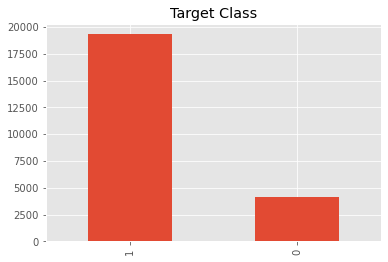

In [11]:
df['Recommended IND'].value_counts().plot.bar()
plt.title('Target Class');

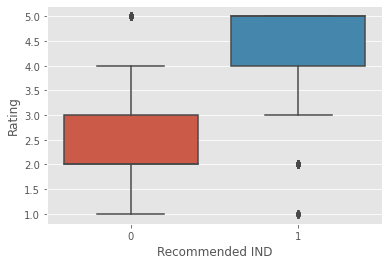

In [13]:
sns.boxplot(x='Recommended IND',y='Rating',data=df);

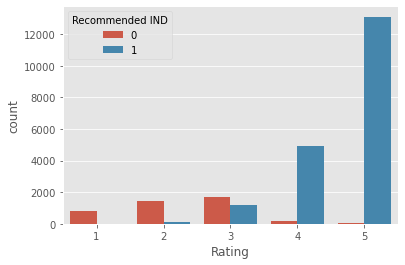

In [14]:
sns.countplot(x='Rating',data=df, hue='Recommended IND');

In [15]:
df.groupby('Rating')['Recommended IND'].value_counts(normalize=True)

Rating  Recommended IND
1       0                  0.980998
        1                  0.019002
2       0                  0.939936
        1                  0.060064
3       0                  0.585859
        1                  0.414141
4       1                  0.966910
        0                  0.033090
5       1                  0.998096
        0                  0.001904
Name: Recommended IND, dtype: float64

**Age**

<AxesSubplot:xlabel='Age', ylabel='Density'>

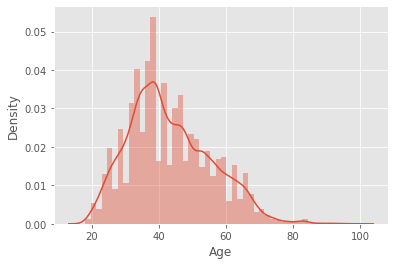

In [16]:
sns.distplot(df.Age)

Text(0.5, 1.0, 'Age Mean by Rating')

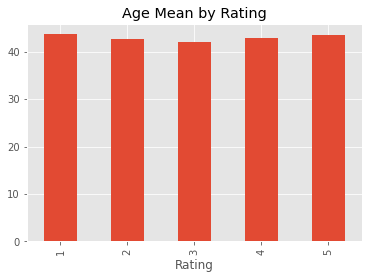

In [17]:
df.groupby('Rating')['Age'].mean().plot.bar()
plt.title('Age Mean by Rating')

Text(0.5, 1.0, 'Age mean by Recommendation')

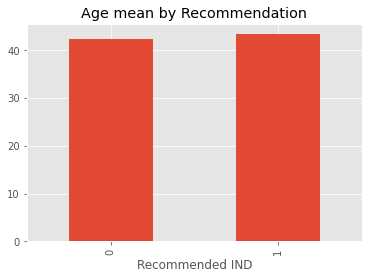

In [18]:
df.groupby('Recommended IND')['Age'].mean().plot.bar()
plt.title('Age mean by Recommendation')

**Department Name/ Class Name/ Division Name**

In [19]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [20]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


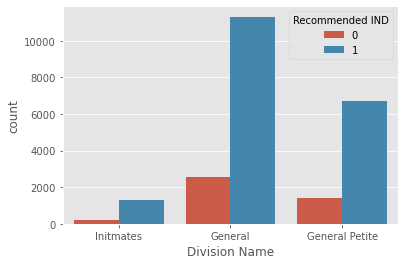

In [21]:
sns.countplot(x='Division Name',data=df, hue='Recommended IND' );

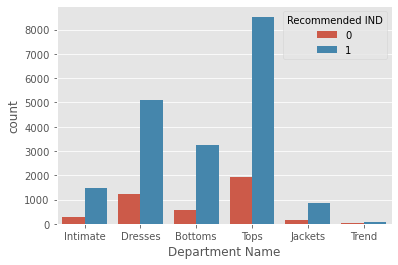

In [22]:
sns.countplot(x='Department Name',data=df, hue='Recommended IND' );

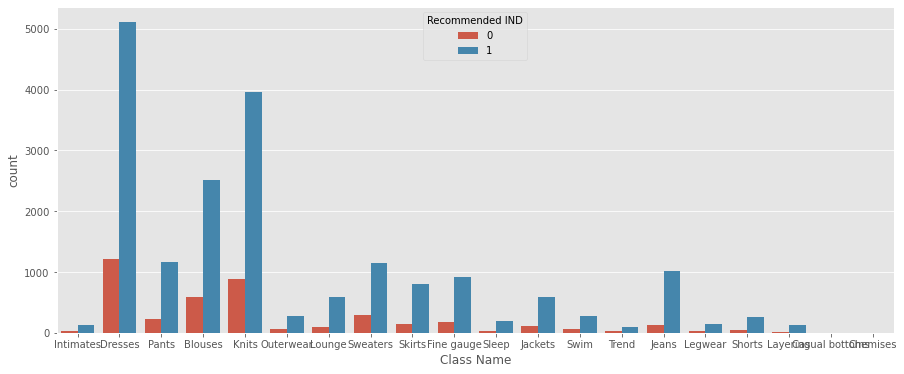

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x='Class Name',data=df, hue='Recommended IND' );

In [24]:
df.groupby(['Division Name','Department Name','Class Name'])['Recommended IND'].value_counts()

Division Name  Department Name  Class Name      Recommended IND
General        Bottoms          Casual bottoms  1                    2
                                Jeans           1                  685
                                                0                  102
                                Pants           1                  684
                                                0                  151
                                                                  ... 
Initmates      Intimate         Lounge          0                   59
                                Sleep           1                  195
                                                0                   33
                                Swim            1                  282
                                                0                   68
Name: Recommended IND, Length: 62, dtype: int64

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

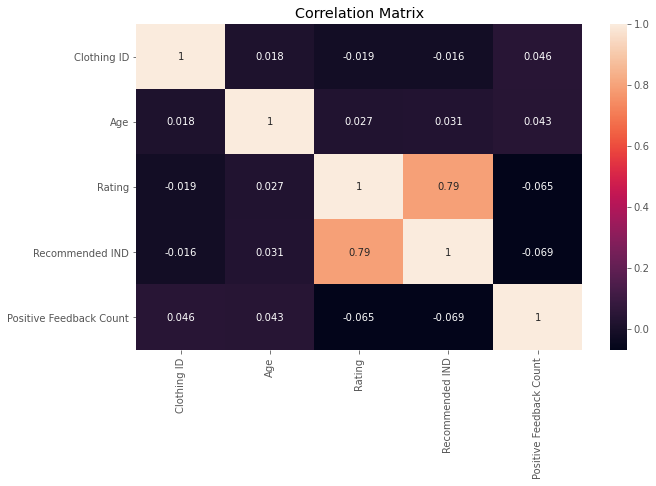

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix");

In [26]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Creating new df with text and label

In [27]:
df = df[['Review Text','Recommended IND']]

In [28]:
df.columns = ['Text','Label']

### Missing Value Detection

In [29]:
df.isnull().sum()

Text     845
Label      0
dtype: int64

In [30]:
df.shape

(23486, 2)

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(22641, 2)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization

In [33]:
df.head()

,Text,Label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [34]:
type(df['Text'][0])

str

In [35]:
df['Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Text, dtype: object

In [36]:
df["Text"]=df["Text"].apply(lambda x: word_tokenize(x.lower()))

In [37]:
df['Text'].head()

0    [absolutely, wonderful, -, silky, and, sexy, a...
1    [love, this, dress, !, it, 's, sooo, pretty, ....
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, ,, love, ,, love, this, jumpsuit, .,...
4    [this, shirt, is, very, flattering, to, all, d...
Name: Text, dtype: object

### Noise Removal

In [38]:
df["Text"]=df["Text"].apply(lambda x: list(i for i in x if i.isalpha()))

In [39]:
df['Text'].head()

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, it, sooo, pretty, i, happe...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, fun,...
4    [this, shirt, is, very, flattering, to, all, d...
Name: Text, dtype: object

In [40]:
stop_words = stopwords.words('english')
df["Text"]=df["Text"].apply(lambda x: list(i for i in x if i not in stop_words))

In [41]:
df['Text'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Text, dtype: object

### Lexicon Normalization

In [42]:
df["Text"]=df["Text"].apply(lambda x: list(WordNetLemmatizer().lemmatize(i) for i in x))

In [43]:
df['Text'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hope, dress, really, wanted, work, init...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Text, dtype: object

**Joining words**

In [44]:
df["Text"]=df["Text"].apply(lambda x: " ".join(x))

In [45]:
df['Text'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Text, dtype: object

**Cleaning Rare Words**

In [46]:
rare_words = pd.Series(' '.join(df['Text']).split()).value_counts()[-300:]
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [47]:
df_positive = df[df['Label']==1]
df_negative = df[df['Label']==0]

In [48]:
df_positive.head()

,Text,Label
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1


In [49]:
df_negative.head()

,Text,Label
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0
22,first pullover styling side zipper would purch...,0
25,loved material didnt really look long dress pu...,0


In [50]:
print('Positive shape:', df_positive.shape)
print('Negative shape:', df_negative.shape)

Positive shape: (18540, 2)
Negative shape: (4101, 2)


### Collect Words (positive and negative separately)

In [53]:
# !pip install wordcloud

In [54]:
from wordcloud import WordCloud

In [59]:
wordcloud_positive = WordCloud(background_color="white").generate(' '.join(df_positive['Text']))
wordcloud_negative = WordCloud(background_color="white").generate(' '.join(df_negative['Text']))

In [51]:
'''
Alternative way for combining texts

positive_words =[]
for review in positive.Review:
    positive_words.append(review)
positive_words = ' '.join(positive_words)
positive_words[:200]

negative_words = []
for review in negative.Review:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:200]
'''

"\nAlternative way for combining texts\n\npositive_words =[]\nfor review in positive.Review:\n    positive_words.append(review)\npositive_words = ' '.join(positive_words)\npositive_words[:200]\n\nnegative_words = []\nfor review in negative.Review:\n    negative_words.append(review)\nnegative_words = ' '.join(negative_words)\nnegative_words[:200]\n"

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

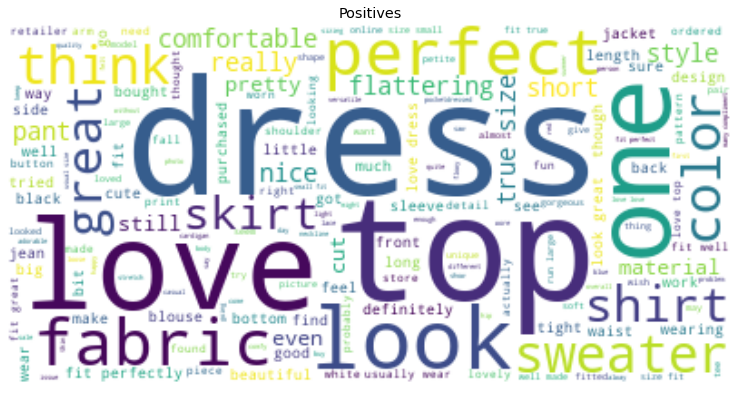

In [60]:
# Wordcloud of positives
plt.figure(figsize=(13,13))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positives')
plt.show()

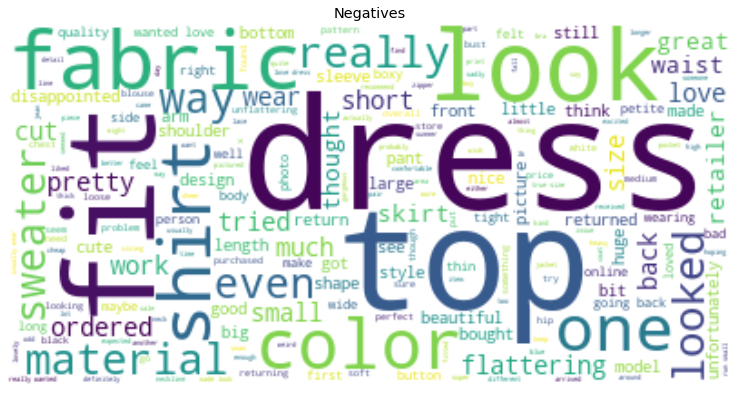

In [61]:
# Wordcloud of negatives
plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negatives')
plt.show()

In [62]:
wordcloud_all = WordCloud(background_color="white").generate(' '.join(df['Text']))

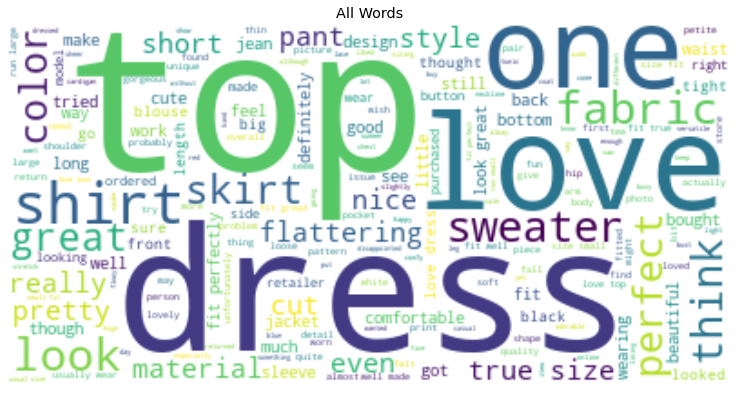

In [63]:
# Wordcloud of negatives
plt.figure(figsize=(13,13))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('All Words')
plt.show()

**Counting the Most Common Words**

In [64]:
from collections import Counter

In [65]:
# Most common words for positives
Counter(" ".join(df_positive["Text"]).split()).most_common(10)

[('dress', 9249),
 ('fit', 8638),
 ('love', 8062),
 ('size', 8020),
 ('top', 6584),
 ('color', 5903),
 ('wear', 5740),
 ('great', 5572),
 ('look', 5308),
 ('like', 5290)]

In [66]:
# Most common words for negatives
Counter(" ".join(df_negative["Text"]).split()).most_common(10)

[('dress', 2103),
 ('like', 1746),
 ('top', 1697),
 ('look', 1582),
 ('fit', 1490),
 ('would', 1449),
 ('size', 1343),
 ('fabric', 1265),
 ('back', 1026),
 ('color', 1013)]

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.3, random_state=42)

In [69]:
X_train.shape

(15848,)

In [70]:
X_test.shape

(6793,)

In the next step we create a numerical feature vector for each document:

### Vectorization

In [71]:
vectorizer = CountVectorizer().fit(X_train)

In [72]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [73]:
vectorizer.get_feature_names()[0:5]

['aa', 'aaaaaaamazing', 'aaaaannnnnnd', 'aaaahmazing', 'aaahed']

In [74]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
X_train_count.shape

(15848, 10031)

### TF-IDF

In [76]:
tf_idf_word_vec = TfidfVectorizer().fit(X_train)

In [77]:
X_train_tfidf = tf_idf_word_vec.transform(X_train)
X_test_tfidf = tf_idf_word_vec.transform(X_test)

In [78]:
tf_idf_word_vec.get_feature_names()[0:5]

['aa', 'aaaaaaamazing', 'aaaaannnnnnd', 'aaaahmazing', 'aaahed']

In [79]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
X_train_tfidf.shape

(15848, 10031)

**Count Vectorizer Sparse Matrix as dataframe**

In [81]:
a = pd.DataFrame(X_train_count.toarray(),columns=vectorizer.get_feature_names())
pd.set_option('display.max_columns',1000)
a.head()

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaahed,ab,abbey,abby,abck,abdomen,abercrombie,ability,abject,able,abnormal,abnormally,abo,abolutely,abou,abroad,abruptly,absolute,absolutely,absolutley,absolutly,absoluty,absorbent,abstract,absurd,abt,abundance,abundant,abut,ac,accent,accented,accenting,accentuate,accentuatea,accentuated,accentuates,accentuating,accept,acceptabl,acceptable,acceptably,accepted,accepts,access,accessorize,accessorized,accessorizes,accessorizing,accessory,accident,accidental,accidentally,acco,accomadate,accommodate,accommodated,accommodates,accommodating,accomodate,accompanies,accompanying,accomplish,accomplishing,accomplishment,accord,accordance,according,accordingly,account,accumulate,accurate,accurately,ace,acetate,achieve,achieved,acid,acknowledge,acquisition,across,acrossed,acrylic,act,action,active,actively,activewear,activity,actual,actuality,actuallly,actually,actualyl,acutually,ad,ada,add,added,addict,addicted,addiction,adding,addit,addition,additional,additionally,address,addtl,adequate,adequately,adirondacks,adj,adjacent,adjust,adjustability,adjustable,adjusted,adjusting,adjustment,admirable,admire,admired,admirin,admiring,admit,admittedly,adn,ador,adorable,adorably,adore,adoreable,adored,adoring,adult,advantage,adventure,adventurous,advertised,advertising,advice,advise,advised,aesthetic,aesthetically,affair,affect,affected,affixed,afford,affordable,afforded,affords,afghan,aforementioned,afraid,afterall,afternoon,afterthought,afterward,afterwards,afterwork,ag,aga,age,aged,ageing,ageless,aggressive,aghast,agin,agitated,agitates,ago,agree,agreed,agreeing,agreement,agrees,agustable,ah,ahd,ahead,ahge,ahh,ahhh,ahold,ahs,ahve,ai,air,airflow,airier,airiness,airism,airline,airly,airplane,airport,airy,aize,aka,akemi,akward,al,ala,alaska,albeit,alce,aleardy,alexandria,ali,align,aligned,aligning,alignment,alike,aline,alittle,allergic,alleviate,alley,allison,allllllmost,allot,allover,allow,allowance,allowed,allowing,allows,alludes,alluring,allusion,almost,alone,along,alot,alpaca,alrea,alread,already,alright,also,alst,alt,alter,alteration,altered,altering,alternate,alternately,alternation,alternative,althetic,althleisure,altho,although,alto,altogether,always,ama,amadi,amalfi,amaz,amaze,amazed,amazement,amazing,amazingly,amazon,ambiguous,ambitious,amd,american,amidst,amking,among,amoret,amorphous,amost,amount,amp,ample,amply,amputated,amt,amterial,an,anafa,analysis,anatomy,anchor,andddddd,andheavy,androgynous,ang,angel,angela,angle,angled,angling,angora,anhtro,animal,anita,ankle,anlobn,ann,anna,annie,anniversary,annoy,annoyance,annoyed,annoying,annoys,annual,anorak,anothe,another,anothr,anrtho,answer,ant,ante,anth,anther,anthletic,antho,anthopology,anthto,anti,anticipate,anticipated,anticipating,anticipation,anticpated,antique,antrho,antro,antropologie,anwen,anxious,anxiously,anybody,anyday,anyhow,anymore,anyone,anyou,anyt,anything,anytime,anyway,anyways,anywhere,aottern,ap,apart,apetite,apex,aplique,apocolypse,app,appalled,apparel,apparent,apparently,appeal,appealed,appealing,appear,appearance,appeared,appearing,appears,appetite,apple,applied,applies,applique,apply,applying,appr,appreciate,appreciated,apprehensive,approach,approaching,appropirate,appropr,approprialty,appropriarely,appropriate,appropriately,approriate,approx,approximate,approximately,apprx,apre,apres,apricot,april,apron,aprts,apt,aptly,aqua,ar,arbor,arc,architectural,arctic,area,areturn,arguably,argument,aria,arielle,arise,ark,arm,armed,armful,armhole,armpit,armscye,army,aroun,around,arranged,arrangement,array,arrival,arrive,arrived,arrives,arriving,arrow,art,artfully,article,artificial,artist,artistic,artistically,artsy,artwork,arty,asap,ascetic,asflattering,ash,ashamed,asheville,ashley,asia,asian,aside,ask,aske,asked,askedher,asking,aspect,assemblage,assessed,assessing,asset,assistance,assistant,associate,association,assume,assumed,assuming,assumption,assure,assured,assures,assymetrical,aster,asthetic,asthetically,astoria,astounded,astrono

**TF-IDF Sparse Matrix as dataframe**

In [82]:
b = pd.DataFrame(X_test_tfidf.toarray(),columns=tf_idf_word_vec.get_feature_names())
pd.set_option('display.max_columns',1000)
b.head()

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaahed,ab,abbey,abby,abck,abdomen,abercrombie,ability,abject,able,abnormal,abnormally,abo,abolutely,abou,abroad,abruptly,absolute,absolutely,absolutley,absolutly,absoluty,absorbent,abstract,absurd,abt,abundance,abundant,abut,ac,accent,accented,accenting,accentuate,accentuatea,accentuated,accentuates,accentuating,accept,acceptabl,acceptable,acceptably,accepted,accepts,access,accessorize,accessorized,accessorizes,accessorizing,accessory,accident,accidental,accidentally,acco,accomadate,accommodate,accommodated,accommodates,accommodating,accomodate,accompanies,accompanying,accomplish,accomplishing,accomplishment,accord,accordance,according,accordingly,account,accumulate,accurate,accurately,ace,acetate,achieve,achieved,acid,acknowledge,acquisition,across,acrossed,acrylic,act,action,active,actively,activewear,activity,actual,actuality,actuallly,actually,actualyl,acutually,ad,ada,add,added,addict,addicted,addiction,adding,addit,addition,additional,additionally,address,addtl,adequate,adequately,adirondacks,adj,adjacent,adjust,adjustability,adjustable,adjusted,adjusting,adjustment,admirable,admire,admired,admirin,admiring,admit,admittedly,adn,ador,adorable,adorably,adore,adoreable,adored,adoring,adult,advantage,adventure,adventurous,advertised,advertising,advice,advise,advised,aesthetic,aesthetically,affair,affect,affected,affixed,afford,affordable,afforded,affords,afghan,aforementioned,afraid,afterall,afternoon,afterthought,afterward,afterwards,afterwork,ag,aga,age,aged,ageing,ageless,aggressive,aghast,agin,agitated,agitates,ago,agree,agreed,agreeing,agreement,agrees,agustable,ah,ahd,ahead,ahge,ahh,ahhh,ahold,ahs,ahve,ai,air,airflow,airier,airiness,airism,airline,airly,airplane,airport,airy,aize,aka,akemi,akward,al,ala,alaska,albeit,alce,aleardy,alexandria,ali,align,aligned,aligning,alignment,alike,aline,alittle,allergic,alleviate,alley,allison,allllllmost,allot,allover,allow,allowance,allowed,allowing,allows,alludes,alluring,allusion,almost,alone,along,alot,alpaca,alrea,alread,already,alright,also,alst,alt,alter,alteration,altered,altering,alternate,alternately,alternation,alternative,althetic,althleisure,altho,although,alto,altogether,always,ama,amadi,amalfi,amaz,amaze,amazed,amazement,amazing,amazingly,amazon,ambiguous,ambitious,amd,american,amidst,amking,among,amoret,amorphous,amost,amount,amp,ample,amply,amputated,amt,amterial,an,anafa,analysis,anatomy,anchor,andddddd,andheavy,androgynous,ang,angel,angela,angle,angled,angling,angora,anhtro,animal,anita,ankle,anlobn,ann,anna,annie,anniversary,annoy,annoyance,annoyed,annoying,annoys,annual,anorak,anothe,another,anothr,anrtho,answer,ant,ante,anth,anther,anthletic,antho,anthopology,anthto,anti,anticipate,anticipated,anticipating,anticipation,anticpated,antique,antrho,antro,antropologie,anwen,anxious,anxiously,anybody,anyday,anyhow,anymore,anyone,anyou,anyt,anything,anytime,anyway,anyways,anywhere,aottern,ap,apart,apetite,apex,aplique,apocolypse,app,appalled,apparel,apparent,apparently,appeal,appealed,appealing,appear,appearance,appeared,appearing,appears,appetite,apple,applied,applies,applique,apply,applying,appr,appreciate,appreciated,apprehensive,approach,approaching,appropirate,appropr,approprialty,appropriarely,appropriate,appropriately,approriate,approx,approximate,approximately,apprx,apre,apres,apricot,april,apron,aprts,apt,aptly,aqua,ar,arbor,arc,architectural,arctic,area,areturn,arguably,argument,aria,arielle,arise,ark,arm,armed,armful,armhole,armpit,armscye,army,aroun,around,arranged,arrangement,array,arrival,arrive,arrived,arrives,arriving,arrow,art,artfully,article,artificial,artist,artistic,artistically,artsy,artwork,arty,asap,ascetic,asflattering,ash,ashamed,asheville,ashley,asia,asian,aside,ask,aske,asked,askedher,asking,aspect,assemblage,assessed,assessing,asset,assistance,assistant,associate,association,assume,assumed,assuming,assumption,assure,assured,assures,assymetrical,aster,asthetic,asthetically,astoria,astounded,astrono

### Logistic Regression

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 733  514]
 [ 270 5276]]
              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1247
           1       0.91      0.95      0.93      5546

    accuracy                           0.88      6793
   macro avg       0.82      0.77      0.79      6793
weighted avg       0.88      0.88      0.88      6793



In [85]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_tf = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_tf)

Count Vectors Accuracy: 0.8764922463830894
TF-IDF Accuracy: 0.873253920124751


### Naive Bayes 



In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_count.toarray(), y_train)
# Make predictions
y_pred = nb_classifier.predict(X_test_count.toarray())
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 816  431]
 [ 317 5229]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.69      1247
           1       0.92      0.94      0.93      5546

    accuracy                           0.89      6793
   macro avg       0.82      0.80      0.81      6793
weighted avg       0.89      0.89      0.89      6793



In [88]:
nb_classifier = MultinomialNB().fit(X_train_count, y_train)
nb_accuracy_count = model_selection.cross_val_score(nb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", nb_accuracy_count)

nb_classifier = MultinomialNB().fit(X_train_tfidf, y_train)
nb_accuracy_tf = model_selection.cross_val_score(nb_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", nb_accuracy_tf)

Count Vectors Accuracy: 0.8776691501342805
TF-IDF Accuracy: 0.8171651650350862


### Support Vector Machine (SVM)

In [89]:
from sklearn.svm import SVC

In [90]:
svm_model = SVC().fit(X_train_count, y_train)
y_pred = svm_model.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 628  619]
 [ 160 5386]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62      1247
           1       0.90      0.97      0.93      5546

    accuracy                           0.89      6793
   macro avg       0.85      0.74      0.77      6793
weighted avg       0.88      0.89      0.87      6793



In [78]:
svc = SVC().fit(X_train_count, y_train)
svc_accuracy_count = model_selection.cross_val_score(svc,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", svc_accuracy_count)

svc = SVC().fit(X_train_tfidf , y_train)

svc_accuracy_tf = model_selection.cross_val_score(svc, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", svc_accuracy_tf)

Count Vectors Accuracy: 0.8751659014121114
TF-IDF Accuracy: 0.873547604608854


### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_model = RandomForestClassifier().fit(X_train_count, y_train)
y_pred = rf_model.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 303  944]
 [  39 5507]]
              precision    recall  f1-score   support

           0       0.89      0.24      0.38      1247
           1       0.85      0.99      0.92      5546

    accuracy                           0.86      6793
   macro avg       0.87      0.62      0.65      6793
weighted avg       0.86      0.86      0.82      6793



In [81]:
rf = RandomForestClassifier().fit(X_train_count, y_train)
rf_accuracy_count = model_selection.cross_val_score(rf,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", rf_accuracy_count)

rf = RandomForestClassifier().fit(X_train_tfidf , y_train)

rf_accuracy_tf = model_selection.cross_val_score(rf, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy       :", rf_accuracy_tf)

Count Vectors Accuracy: 0.8441048687516244
TF-IDF Accuracy       : 0.8413092350342198


**Tuning Random Forest**

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
rf_params = { 'n_estimators':[50,100,300],
             'max_depth':[3,5,6],
             'max_features':[3,6,8],
             'min_samples_split':[2,4,6]}

rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train_count, y_train)
rf_cv_model.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.3min finished


{'max_depth': 3, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 50}

In [88]:
rf_tuned = RandomForestClassifier(max_depth = 3,max_features = 2,min_samples_split = 2,n_estimators = 50).fit(X_train_count, y_train)


rf_accuracy_count_tuned = model_selection.cross_val_score(rf_tuned,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", rf_accuracy_count_tuned)


rf_tuned = RandomForestClassifier(max_depth = 3,max_features = 2,min_samples_split = 2,n_estimators = 50).fit(X_train_tfidf, y_train)
rf_accuracy_tf_tuned = model_selection.cross_val_score(rf_tuned, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy       :", rf_accuracy_tf_tuned)

Count Vectors Accuracy: 0.8164287880100494
TF-IDF Accuracy       : 0.8164287880100494


### XGBOOST

In [82]:
from xgboost import XGBClassifier

In [90]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 609  638]
 [ 207 5339]]
              precision    recall  f1-score   support

           0       0.75      0.49      0.59      1247
           1       0.89      0.96      0.93      5546

    accuracy                           0.88      6793
   macro avg       0.82      0.73      0.76      6793
weighted avg       0.87      0.88      0.86      6793



In [91]:
xgb_classifier = XGBClassifier().fit(X_train_count , y_train)

xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

xgb_classifier = XGBClassifier().fit(X_train_tfidf , y_train)

xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy       :", xgb_accuracy_tf)

Count Vectors Accuracy: 0.8761998613878541
TF-IDF Accuracy       : 0.8781127090011263


**Tuning XGBOOST**

In [96]:
xgb_params = {"n_estimators": [50, 300, 500],
             "subsample":[0.1,0.7],
             "max_depth":[3,10, 20],
             "learning_rate":[0.1, 0.3, 1]}


xgb = XGBClassifier()
xgb_classifier_tuned = GridSearchCV(xgb, xgb_params, cv = 3, 
                            n_jobs = -1, verbose = 2).fit(X_train_count , y_train)
xgb_classifier_tuned.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min


KeyboardInterrupt: 

In [93]:
xgb_tuned = XGBClassifier(learning_rate =0.1, max_depth=10, n_estimators=500, subsample=0.7).fit(X_train_count, y_train)

xgb_tuned_accuracy_count_tuned = model_selection.cross_val_score(xgb_tuned,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_tuned_accuracy_count_tuned)


xgb_tuned = XGBClassifier(learning_rate =0.1, max_depth=10, n_estimators=500, subsample=0.7).fit(X_train_tfidf , y_train)

xgb_accuracy_tf_tuned = model_selection.cross_val_score(xgb_tuned, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy       :", xgb_accuracy_tf_tuned)

Count Vectors Accuracy: 0.882676297323053
TF-IDF Accuracy       : 0.8781144416529498


### Ada  Boosting

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
adaboost=AdaBoostClassifier().fit(X_train_count, y_train)
ada_accuracy_count = model_selection.cross_val_score(adaboost,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Ada Boost Accuracy:", ada_accuracy_count)

adaboost=AdaBoostClassifier().fit(X_train_tfidf , y_train)
ada_accuracy_tf = model_selection.cross_val_score(adaboost, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", ada_accuracy_tf)

Ada Boost Accuracy: 0.8592703370007797
TF-IDF Accuracy: 0.853086502642294


### Compare Models Accuracies and F1 Scores

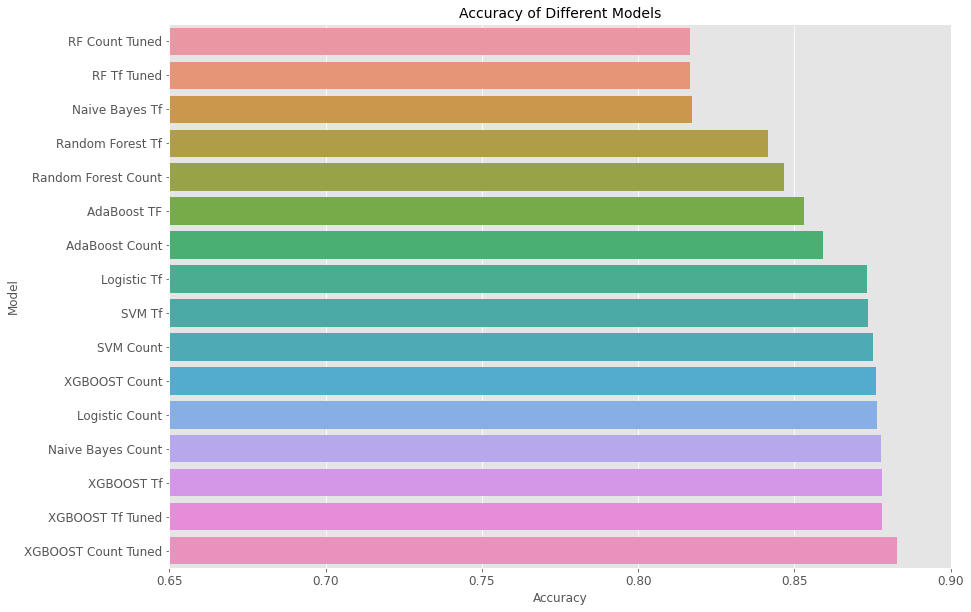

In [96]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "Naive Bayes Count", "Naive Bayes Tf", "SVM Count", 
                                  "SVM Tf", "Random Forest Count","Random Forest Tf", "RF Count Tuned","RF Tf Tuned", 'XGBOOST Count','XGBOOST Tf',
                                  'XGBOOST Count Tuned','XGBOOST Tf Tuned',"AdaBoost Count", "AdaBoost TF" ],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, nb_accuracy_count, nb_accuracy_tf,svc_accuracy_count,svc_accuracy_tf,
                                     rf_accuracy_count,rf_accuracy_tf,rf_accuracy_count_tuned, rf_accuracy_tf_tuned,xgb_accuracy_count,
                                    xgb_accuracy_tf,xgb_tuned_accuracy_count_tuned,xgb_accuracy_tf_tuned,ada_accuracy_count,ada_accuracy_tf]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(14,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)
ax.set_xlim(.65, .90)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy of Different Models", size=14);

### Conclusion

This project was aimed to used sentiment analysis to determine product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for XGBOOST Model. 

### Trying Models with non-Text data

In [97]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [98]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [99]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [100]:
df_num = df[['Age','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']]

In [101]:
df_num.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses


In [104]:
df_num = pd.get_dummies(df_num)

In [105]:
df_num.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Class Name_Blouses,Class Name_Casual bottoms,Class Name_Chemises,Class Name_Dresses,Class Name_Fine gauge,Class Name_Intimates,Class Name_Jackets,Class Name_Jeans,Class Name_Knits,Class Name_Layering,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,33,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,5,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50,5,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,47,5,1,6,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
df_num.shape

(23486, 33)

In [108]:
df_num.isnull().sum().any()

False

In [109]:
features = df_num.drop('Recommended IND', axis=1)
target = df_num['Recommended IND']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [111]:
X_train.shape

(16440, 32)

In [112]:
X_test.shape

(7046, 32)

### KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

[[ 898  360]
 [ 197 5591]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1258
           1       0.94      0.97      0.95      5788

    accuracy                           0.92      7046
   macro avg       0.88      0.84      0.86      7046
weighted avg       0.92      0.92      0.92      7046



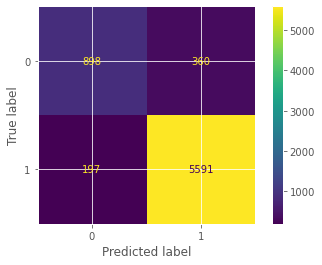

In [118]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(knn_model,X_test,y_test);

Text(0, 0.5, 'Error Rate')

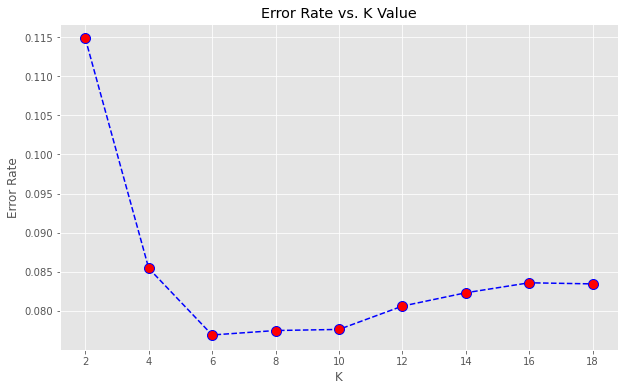

In [122]:
error_rate = []

# Will take some time
for i in range(2,20,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(2,20,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

[[ 974  284]
 [ 258 5530]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1258
           1       0.95      0.96      0.95      5788

    accuracy                           0.92      7046
   macro avg       0.87      0.86      0.87      7046
weighted avg       0.92      0.92      0.92      7046



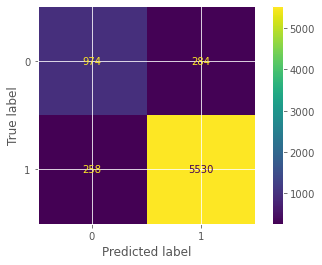

In [123]:
knn_model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(knn_model,X_test,y_test);

In [125]:
from sklearn.metrics import f1_score

In [127]:
knn_f1 = f1_score(y_test, y_pred, average='macro')
knn_accuracy = knn.score(X_test,y_test)
print('knn_f1:', knn_f1)
print('knn_accuracy:', knn_accuracy)

knn_f1: 0.8678066169175929
knn_accuracy: 0.9165483962531933


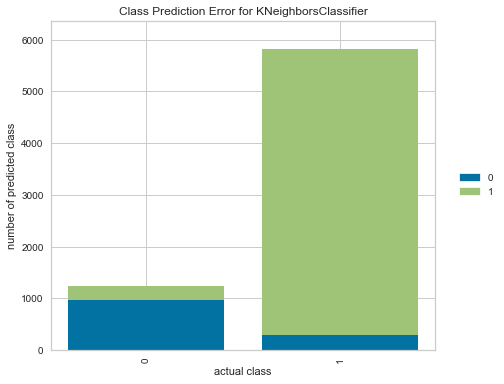

In [128]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(KNeighborsClassifier(n_neighbors=6))
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show();

### Random Forest

In [129]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[ 998  260]
 [ 285 5503]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1258
           1       0.95      0.95      0.95      5788

    accuracy                           0.92      7046
   macro avg       0.87      0.87      0.87      7046
weighted avg       0.92      0.92      0.92      7046



In [132]:
rf_f1 = f1_score(y_test, pred_rf, average='macro')
rf_accuracy = rf_model.score(X_test,y_test)
print('rf_f1:', rf_f1)
print('rf_accuracy:', rf_accuracy)

rf_f1: 0.8691677253155599
rf_accuracy: 0.922651149588419


### XGBOOST

In [133]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
pred_xg = xgb_model.predict(X_test)

print(confusion_matrix(y_test, pred_xg))
print(classification_report(y_test, pred_xg))

[[1059  199]
 [ 293 5495]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1258
           1       0.97      0.95      0.96      5788

    accuracy                           0.93      7046
   macro avg       0.87      0.90      0.88      7046
weighted avg       0.93      0.93      0.93      7046



In [134]:
from sklearn.metrics import accuracy_score
xgb_accuracy = accuracy_score(y_test, pred_xg)
xgb_f1 = f1_score(y_test, pred_xg, average='macro')
print('xgb_f1:', xgb_f1)
print('xgb_accuracy:', xgb_accuracy)

xgb_f1: 0.8843222875585375
xgb_accuracy: 0.930173147885325


### Accuracy Comparison

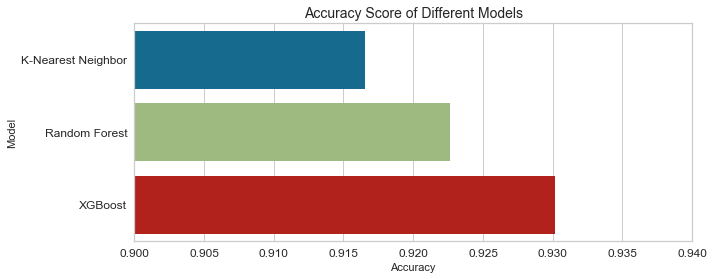

In [145]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost"],
                        "Accuracy": [knn_accuracy, rf_accuracy, xgb_accuracy]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, orient='h')
ax.set_xlim(.9, .94)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy Score of Different Models", size=14);

### F1 Comparison

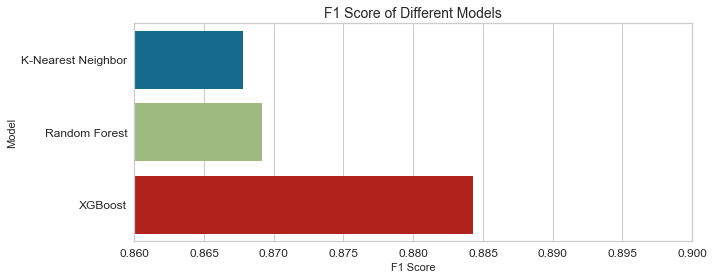

In [144]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost"],
                        "F1 Score": [knn_f1, rf_f1, xgb_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,4))
ax = sns.barplot(x="F1 Score", y="Model", data=compare)
ax.set_xlim(.86, .9)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("F1 Score of Different Models", size=14);

### SMOTE Balancing

In [147]:
df_num.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Class Name_Blouses,Class Name_Casual bottoms,Class Name_Chemises,Class Name_Dresses,Class Name_Fine gauge,Class Name_Intimates,Class Name_Jackets,Class Name_Jeans,Class Name_Knits,Class Name_Layering,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,33,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,5,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50,5,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,47,5,1,6,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
df_num['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [148]:
df_num['Recommended IND'].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

In [151]:
#!pip install imblearn

In [152]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [153]:
features = df_num.drop('Recommended IND', axis=1)
target = df_num['Recommended IND']

In [155]:
# Increasing number of Recommended IND 0 equal to Recommended IND 1
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(features, target)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({1: 19314, 0: 19314})


In [156]:
X_res.shape

(38628, 32)

In [158]:
#Split the resampled data into train & test data 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(27039, 32)
xtest shape
(11589, 32)


### KNN with SMOTE

[[5723  106]
 [ 470 5290]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5829
           1       0.98      0.92      0.95      5760

    accuracy                           0.95     11589
   macro avg       0.95      0.95      0.95     11589
weighted avg       0.95      0.95      0.95     11589



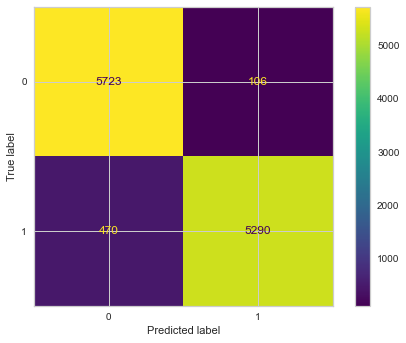

In [174]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred_SMOTE = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))
plot_confusion_matrix(knn_model,X_test,y_test);

In [175]:
knn_f1_SMOTE = f1_score(y_test, y_pred_SMOTE, average='macro')
knn_accuracy_SMOTE = knn.score(X_test,y_test)
print('knn_f1_SMOTE:', knn_f1_SMOTE)
print('knn_accuracy_SMOTE:', knn_accuracy_SMOTE)

knn_f1_SMOTE: 0.9502282149273482
knn_accuracy_SMOTE: 0.94727759081888


### Random Forest with SMOTE

In [163]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
pred_rf_SMOTE = rf_model.predict(X_test)

print(confusion_matrix(y_test, pred_rf_SMOTE))
print(classification_report(y_test, pred_rf_SMOTE))

[[5660  169]
 [ 349 5411]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5829
           1       0.97      0.94      0.95      5760

    accuracy                           0.96     11589
   macro avg       0.96      0.96      0.96     11589
weighted avg       0.96      0.96      0.96     11589



In [165]:
rf_f1_SMOTE = f1_score(y_test, pred_rf_SMOTE, average='macro')
rf_accuracy_SMOTE = rf_model.score(X_test,y_test)
print('rf_f1_SMOTE:', rf_f1_SMOTE)
print('rf_accuracy_SMOTE:', rf_accuracy_SMOTE)

rf_f1_SMOTE: 0.9552817981015311
rf_accuracy_SMOTE: 0.9553024419708344


### XGBOOST with SMOTE

In [160]:
xgb_model = XGBClassifier().fit(X_train, y_train)
pred_xg_SMOTE = xgb_model.predict(X_test)

print(confusion_matrix(y_test, pred_xg_SMOTE))
print(classification_report(y_test, pred_xg_SMOTE))

[[5702  127]
 [ 360 5400]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5829
           1       0.98      0.94      0.96      5760

    accuracy                           0.96     11589
   macro avg       0.96      0.96      0.96     11589
weighted avg       0.96      0.96      0.96     11589



In [162]:
xgb_accuracy_SMOTE = accuracy_score(y_test, pred_xg_SMOTE)
xgb_f1_SMOTE = f1_score(y_test, pred_xg_SMOTE, average='macro')
print('xgb_f1_SMOTE:', xgb_f1_SMOTE)
print('xgb_accuracy_SMOTE:', xgb_accuracy_SMOTE)

xgb_f1_SMOTE: 0.9579488361834133
xgb_accuracy_SMOTE: 0.9579773923548193


__Both f1 and accuracy scores are better after resampling with SMOTE method.__

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___